# Exploratory Data Analysis


Author: Raghu Raman Nanduri

Date: March 03,2019

Course: DSC530 - Term Project

Source Link: https://www.kaggle.com/noriuk/us-education-datasets-unification-project/version/4

Data set: finance_districts.csv
    

Statistical/Hypothetical Question:
    By exploring this data set regarding financial school districts and their enrollment numbers, I want to find out whether there is a any statistical correlation between total revenues of the state and number of enrollment numbers for the school districts. If there is correlation, how much have an impact Total Revenues have on enrollment.


# Import libraries and data set

In [11]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
import scipy.stats as stats
import seaborn as sns

%matplotlib inline

plt.style.use('bmh')

In [12]:
# Importing data set
findistdf = pd.read_csv('src/finance_districts.csv')
findistdf.head()

STATE   ENROLL                            NAME  YRDATA  TOTALREV  \
0  ALABAMA   9609.0  AUTAUGA COUNTY SCHOOL DISTRICT    2016     80867   
1  ALABAMA  30931.0  BALDWIN COUNTY SCHOOL DISTRICT    2016    338236   
2  ALABAMA    912.0  BARBOUR COUNTY SCHOOL DISTRICT    2016     10116   
3  ALABAMA   2842.0    EUFAULA CITY SCHOOL DISTRICT    2016     26182   
4  ALABAMA   3322.0     BIBB COUNTY SCHOOL DISTRICT    2016     32486   

   TFEDREV  TSTREV  TLOCREV  TOTALEXP  TCURINST  TCURSSVC  TCURONON  TCAPOUT  
0     7447   53842    19578     76672     43843     23941    6401.0     1506  
1    23710  145180   169346    299880    164977     97231   19439.0     9749  
2     2342    5434     2340     10070      4907      3896     975.0      110  
3     3558   15900     6724     29843     15302      7901    2274.0     4133  
4     3664   21846     6976     31662     16407     11087    3122.0      486

# Variables

In [13]:
findistdf.columns

Index(['STATE', 'ENROLL', 'NAME', 'YRDATA', 'TOTALREV', 'TFEDREV', 'TSTREV',
       'TLOCREV', 'TOTALEXP', 'TCURINST', 'TCURSSVC', 'TCURONON', 'TCAPOUT'],
      dtype='object')

# Description of the data set

# Data Cleansing

In [14]:
# Let us ignore the variables that are not part of this analysis
findistdf_orig = findistdf # taking backup of the original dataset

findistdf  = findistdf[['STATE', 'ENROLL', 'NAME', 'YRDATA', 'TOTALREV', 'TFEDREV', 'TSTREV', 'TLOCREV', 'TOTALEXP']]


In [15]:
# Lets look at the basic information of the data set
findistdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374161 entries, 0 to 374160
Data columns (total 9 columns):
STATE       374161 non-null object
ENROLL      358293 non-null float64
NAME        374161 non-null object
YRDATA      374161 non-null int64
TOTALREV    374161 non-null int64
TFEDREV     374161 non-null int64
TSTREV      374161 non-null int64
TLOCREV     374161 non-null int64
TOTALEXP    374161 non-null int64
dtypes: float64(1), int64(6), object(2)
memory usage: 25.7+ MB


Looks like ENROLL variable data is not available for the rows. For this analysis, discard the rows that have null or nan values in the 2 important variables - ENROLL and TOTALREV


In [16]:
findistdf = findistdf.dropna(subset = ['ENROLL',  'TOTALREV'])
findistdf_orig2 = findistdf
findistdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358293 entries, 0 to 358292
Data columns (total 9 columns):
STATE       358293 non-null object
ENROLL      358293 non-null float64
NAME        358293 non-null object
YRDATA      358293 non-null int64
TOTALREV    358293 non-null int64
TFEDREV     358293 non-null int64
TSTREV      358293 non-null int64
TLOCREV     358293 non-null int64
TOTALEXP    358293 non-null int64
dtypes: float64(1), int64(6), object(2)
memory usage: 27.3+ MB


# Distributions - Histograms, Outliers

In [17]:
# Getting basic stats
findistdf.describe()

ENROLL         YRDATA      TOTALREV       TFEDREV        TSTREV  \
count  3.582930e+05  358293.000000  3.582930e+05  3.582930e+05  3.582930e+05   
mean   3.134504e+03    2004.400390  3.173910e+04  2.689896e+03  1.473310e+04   
std    1.402406e+04       6.849252  1.816932e+05  1.926575e+04  8.418726e+04   
min    0.000000e+00    1993.000000  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.760000e+02    1998.000000  3.299000e+03  1.730000e+02  1.354000e+03   
50%    9.480000e+02    2004.000000  9.498000e+03  5.380000e+02  4.354000e+03   
75%    2.607000e+03    2010.000000  2.575700e+04  1.677000e+03  1.156600e+04   
max    1.077381e+06    2016.000000  2.744836e+07  3.120314e+06  1.056801e+07   

            TLOCREV      TOTALEXP  
count  3.582930e+05  3.582930e+05  
mean   1.431610e+04  3.209838e+04  
std    8.637972e+04  1.937165e+05  
min    0.000000e+00  0.000000e+00  
25%    1.125000e+03  3.231000e+03  
50%    3.513000e+03  9.433000e+03  
75%    1.101400e+04  2.585600e+04  
max    1.514124e+07  2.962010e+07

Drawing Histograms and Density plots

C:\Installed\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


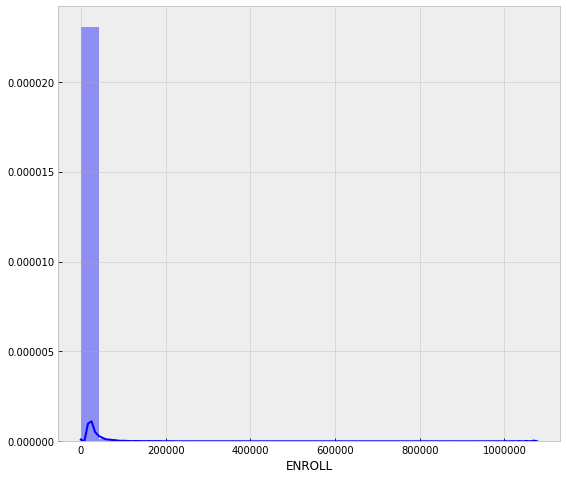

In [18]:

plt.figure(figsize=(9, 8))
#sns.distplot(findistdf['ENROLL'], color='b', bins=25, hist_kws={'alpha': 0.4});
sns.distplot(findistdf['ENROLL'], color='b',hist = True,  bins=25) #, hist_kws={'alpha': 0.4});

Text(0.5,1,'Histogram of ENROLL')

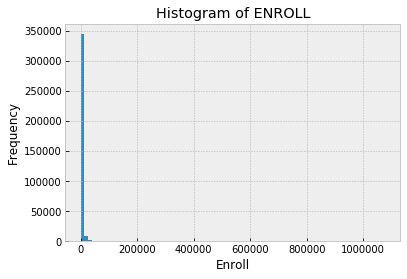

In [19]:
findistdf['ENROLL'].hist(bins = 80)
#plt.locator_params(nbins=20)
plt.xlabel('Enroll')
plt.ylabel('Frequency')
plt.title('Histogram of ENROLL')

C:\Installed\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


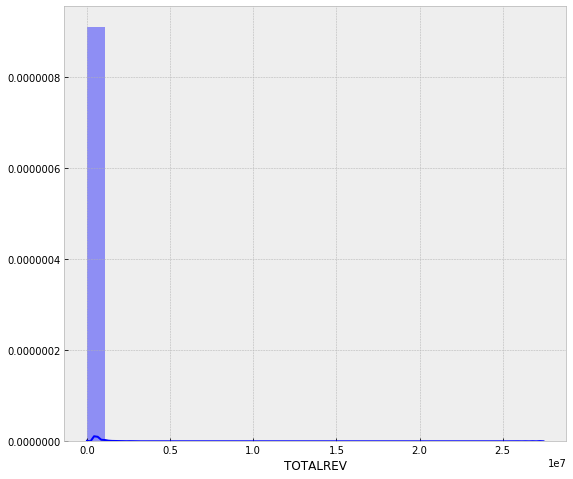

In [20]:
plt.figure(figsize=(9, 8))
#sns.distplot(findistdf['ENROLL'], color='b', bins=25, hist_kws={'alpha': 0.4});
sns.distplot(findistdf['TOTALREV'], color='b',hist = True,  bins=25) #, hist_kws={'alpha': 0.4});

Text(0.5,1,'Histogram of TOTAL REVENUE')

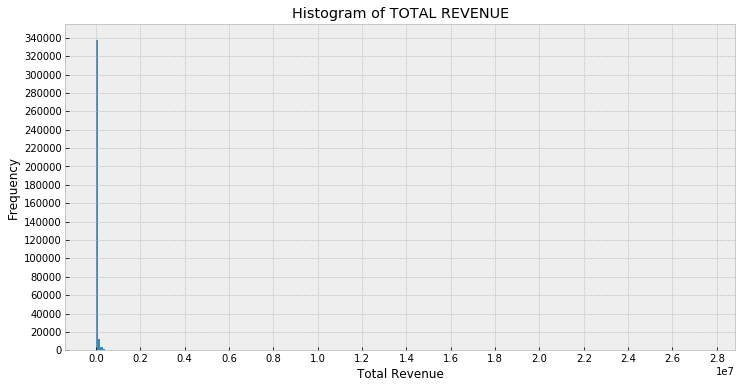

In [21]:
# Trying to find apt number of bins from min to max
findistdf['TOTALREV'].hist(bins = 275,  figsize=[12,6])
plt.locator_params(nbins=20)
plt.xlabel('Total Revenue')
plt.ylabel('Frequency')
plt.title('Histogram of TOTAL REVENUE')

Both ENROLL and TOTALREV variables are asymmetrically (positively) skewed with longer tail towards the higher values.

Clearly there are some outliers in ENROLL and TOTALREV that are skewing the distributions heavily. 

In [22]:
findistdf.groupby('STATE').TOTALREV.agg(['min', 'max', 'mean', 'var'])

min       max          mean           var
STATE                                                              
ALABAMA                   782    618181  4.349568e+04  4.077881e+09
ALASKA                    158    914050  3.285153e+04  6.995753e+09
ARIZONA                     0    635243  2.863350e+04  3.976721e+09
ARKANSAS                    0    371708  1.339582e+04  6.637229e+08
CALIFORNIA                  0  10329380  5.464825e+04  6.051548e+10
COLORADO                    0   1271873  3.538293e+04  1.027157e+10
CONNECTICUT                78    527210  4.415065e+04  3.689717e+09
DELAWARE                 3879    318466  7.314053e+04  4.044500e+09
DISTRICT_OF_COLUMBIA   678874   1382282  1.033762e+06  6.165597e+10
FLORIDA                  5712   3959408  3.172400e+05  3.023165e+11
GEORGIA                   739   1893150  7.196012e+04  2.694898e+10
HAWAII                1062475   3030519  2.047635e+06  4.478832e+11
IDAHO                      41    281989  1.491776e+04  8.556664e+08
ILLINOIS                    0   5760419  2.163508e+04  1.942673e+10
INDIANA                     0    729047  3.179480e+04  2.305822e+09
IOWA                      683    482554  1.250332e+04  6.858602e+08
KANSAS                    551    666255  1.472987e+04  1.616821e+09
KENTUCKY                    0   1323404  3.216628e+04  6.154377e+09
LOUISIANA                7144    625708  9.061099e+04  1.280243e+10
MAINE                       0    119828  7.764532e+03  1.349948e+08
MARYLAND                16763   3159510  4.132408e+05  3.104588e+11
MASSACHUSETTS               0   1481699  3.228844e+04  4.637021e+09
MICHIGAN                    0   1671978  2.475151e+04  3.685789e+09
MINNESOTA                   0    716799  2.087318e+04  2.691517e+09
MISSISSIPPI                 0    291507  2.321156e+04  8.352367e+08
MISSOURI                    0    510063  1.506467e+04  1.466022e+09
MONTANA                     0    117079  2.835495e+03  4.497919e+07
NEBRASKA                    1    687093  6.218597e+03  8.453300e+08
NEVADA                   1294   3220684  1.803720e+05  2.960478e+11
NEW_HAMPSHIRE               2    186461  1.244669e+04  3.501079e+08
NEW_JERSEY                  1   1163400  3.597258e+04  4.114898e+09
NEW_MEXICO                745   1051179  3.249878e+04  7.939642e+09
NEW_YORK                    1  27448356  6.258730e+04  4.314818e+11
NORTH_CAROLINA           4938   2297008  9.167576e+04  2.673796e+10
NORTH_DAKOTA               10    177525  4.296540e+03  1.610324e+08
OHIO                        1    980035  2.541799e+04  2.812349e+09
OKLAHOMA                    0    478115  8.822205e+03  6.638011e+08
OREGON                     39    697501  2.195237e+04  2.554278e+09
PENNSYLVANIA                0   3030964  3.618602e+04  9.705357e+09
RHODE_ISLAND             1732    461090  4.848231e+04  3.628086e+09
SOUTH_CAROLINA              0    855902  6.281708e+04  9.269236e+09
SOUTH_DAKOTA               17    230640  6.363154e+03  2.463003e+08
TENNESSEE                   0   1470379  4.814285e+04  1.225541e+10
TEXAS                       0   2480131  3.575125e+04  1.146961e+10
UTAH                     1812    635282  8.064527e+04  1.400811e+10
VERMONT                     0     84611  4.518641e+03  3.780746e+07
VIRGINIA                    0   2733933  8.174012e+04  4.034570e+10
WASHINGTON                 25    881789  3.143074e+04  3.719914e+09
WEST_VIRGINIA            2522    384864  4.753317e+04  2.279495e+09
WISCONSIN                 493   1310838  2.122801e+04  3.447978e+09
WYOMING                   593    309591  2.482201e+04  1.315037e+09

In [23]:
findist_bystate = pd.DataFrame()
findist_bystate = findistdf.groupby('STATE', as_index = False)['TOTALREV', 'ENROLL'].max()

In [24]:
#Top 5 states with most total revenue
findist_bystate.sort_values('TOTALREV',ascending=False)[0:5]

STATE  TOTALREV     ENROLL
32    NEW_YORK  27448356  1077381.0
4   CALIFORNIA  10329380   747009.0
13    ILLINOIS   5760419   437418.0
9      FLORIDA   3959408   375836.0
28      NEVADA   3220684   325990.0

In [25]:
#Top 5 states with most total revenue
findist_bystate.sort_values('ENROLL',ascending=False)[0:5]

STATE  TOTALREV     ENROLL
32    NEW_YORK  27448356  1077381.0
4   CALIFORNIA  10329380   747009.0
13    ILLINOIS   5760419   437418.0
9      FLORIDA   3959408   375836.0
28      NEVADA   3220684   325990.0

Clearly California and NewYork are in a different league with respective to Total Revenue and Enroll numbers. So, let's see how the distribution will be if we separate these states from the data set

In [26]:
findistdf_orig3 = findistdf # taking backup copy of df

# separating the records of 'New York' and 'California' from the data set
findistdf = findistdf[(findistdf.STATE != 'NEW_YORK') & (findistdf.STATE != 'CALIFORNIA' )]

# removing recrods with 0 revenue's and enrollments

findistdf = findistdf[(findistdf.ENROLL >0) & (findistdf.TOTALREV >0) &  (findistdf.TFEDREV >0) 
                      &  (findistdf.TSTREV >0) &  (findistdf.TLOCREV >0) &  (findistdf.TOTALEXP >0)  ]

len(findistdf)

287744

Plotting Density plots, histograms

C:\Installed\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


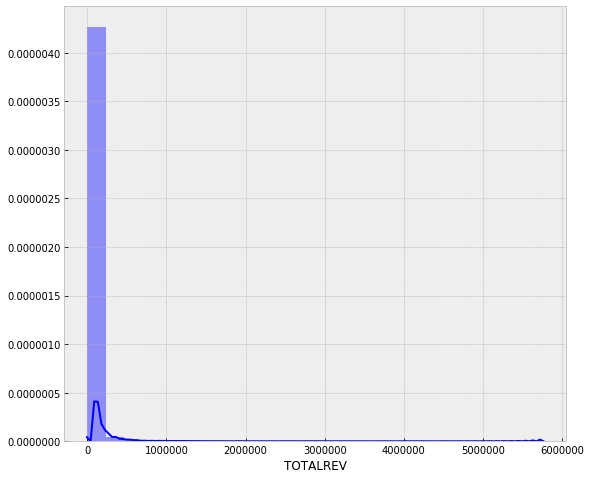

In [27]:
# Density plot for TOTALREV
plt.figure(figsize=(9, 8))
sns.distplot(findistdf['TOTALREV'], color='b', bins=25, hist_kws={'alpha': 0.4});

In [28]:
# Trying to find apt number of bins from min to max
noofbins = np.arange(start=findistdf['TOTALREV'].min(), stop=findistdf['TOTALREV'].max(), step=50000)
print(len(noofbins))

116


Text(0.5,1,'Histogram of TOTAL REVENUE')

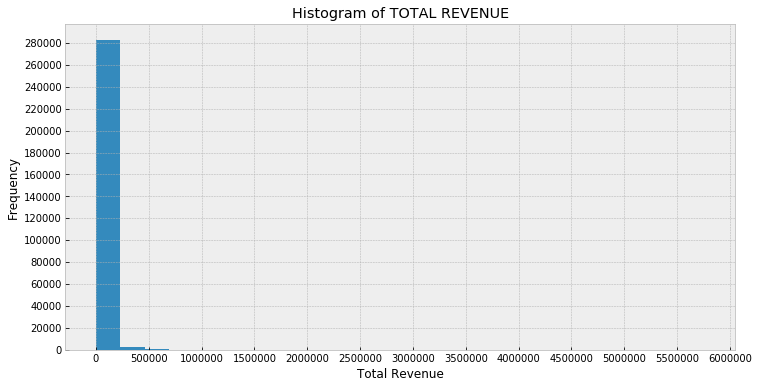

In [29]:

findistdf['TOTALREV'].hist(bins = 25,  figsize=[12,6])
plt.locator_params(nbins=20)
plt.xlabel('Total Revenue')
plt.ylabel('Frequency')
plt.title('Histogram of TOTAL REVENUE')

C:\Installed\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


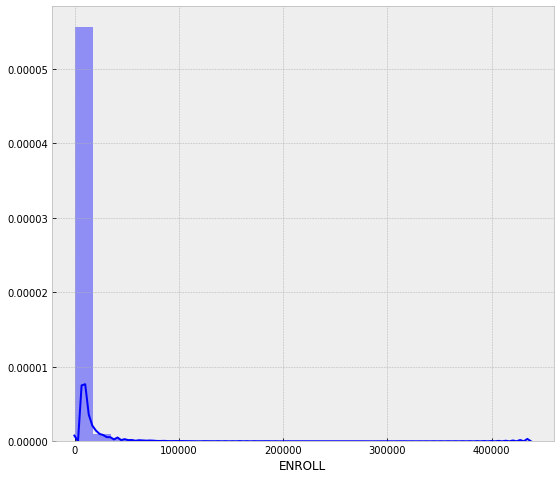

In [30]:
# Density plot for ENROLL
plt.figure(figsize=(9, 8))
sns.distplot(findistdf['ENROLL'], color='b', bins=25, hist_kws={'alpha': 0.4});

In [31]:
# Trying to find apt number of bins from min to max
noofbins = np.arange(start=findistdf['ENROLL'].min(), stop=findistdf['ENROLL'].max(), step=10000)
print(len(noofbins))

44


Text(0.5,1,'Histogram of ENROLL')

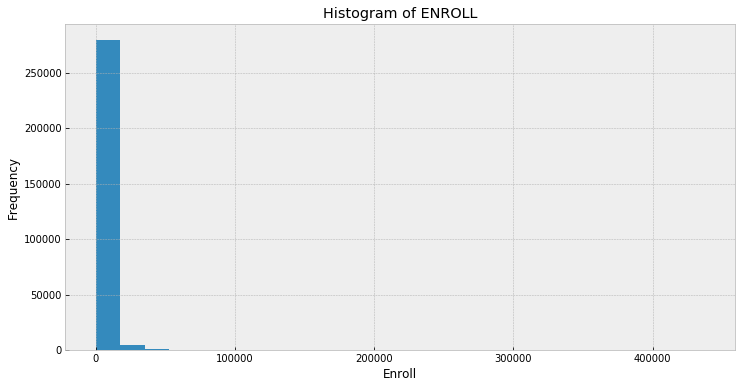

In [32]:
findistdf['ENROLL'].hist(bins = 25,  figsize=[12,6])
#plt.locator_params(nbins=20)
plt.xlabel('Enroll')
plt.ylabel('Frequency')
plt.title('Histogram of ENROLL')

Still most of the numbers are packed at the lower end of the scale for the TOTALREV and ENROLL

# Plotting Histogram for the 5 variables

In [33]:
colnames = ['ENROLL', 'TOTALREV', 'TFEDREV', 'TSTREV','TLOCREV', 'TOTALEXP']
plt.figure(figsize=(15,15))
for i in range(len(colnames)): 
          
    if i == 0:   
        plt.subplot(3,2,1)
    if i == 1:   
        plt.subplot(3,2,2)
    if i == 2:   
        plt.subplot(3,2,3)
    if i ==3:   
        plt.subplot(3,2,4)
    if i == 4:   
        plt.subplot(3,2,5)
    if i == 5:  
        plt.subplot(3,2,6)

    #print(colnames[i])
    plt.hist(findistdf[colnames[i]].dropna())
    plt.ylabel('Frequency')
    plt.xlabel(findistdf[colnames[i]].name)


# Plotting Desnity plots for the 5 variables

In [34]:
colnames = ['ENROLL', 'TOTALREV', 'TFEDREV', 'TSTREV','TLOCREV', 'TOTALEXP']
plt.figure(figsize=(15,15))
for i in range(len(colnames)): 
          
    if i == 0:   
        plt.subplot(3,2,1)
    if i == 1:   
        plt.subplot(3,2,2)
    if i == 2:   
        plt.subplot(3,2,3)
    if i ==3:   
        plt.subplot(3,2,4)
    if i == 4:   
        plt.subplot(3,2,5)
    if i == 5:  
        plt.subplot(3,2,6)

    #print(colnames[i])
    sns.distplot(findistdf[colnames[i]].dropna())


C:\Installed\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


# Plotting outliers using boxplot

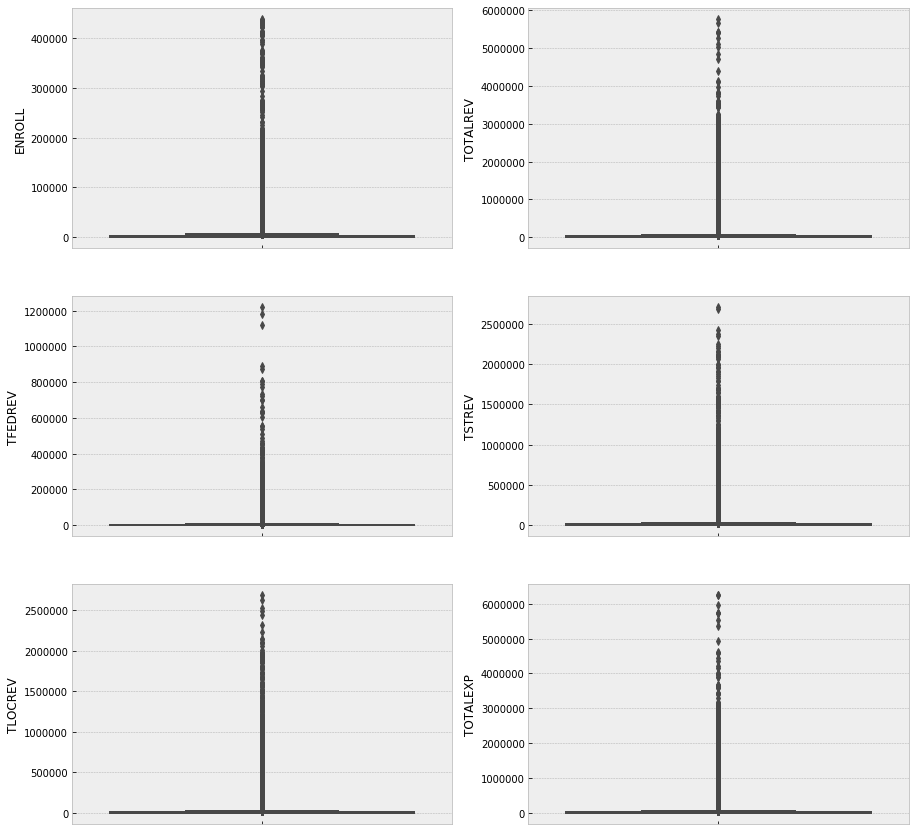

In [35]:
plt.figure(figsize=(15,15))
for i in range(len(colnames)): 
          
    if i == 0:   
        plt.subplot(3,2,1)
    if i == 1:   
        plt.subplot(3,2,2)
    if i == 2:   
        plt.subplot(3,2,3)
    if i ==3:   
        plt.subplot(3,2,4)
    if i == 4:   
        plt.subplot(3,2,5)
    if i == 5:  
        plt.subplot(3,2,6)

    #print(colnames[i])
    sns.boxplot(y=findistdf[colnames[i]].dropna())
    #column=findistdf[colnames[i]]
    #column.to_frame().boxplot(figsize=[4,8])
    #findistdf.boxplot(column=colnames[i], figsize=[4,8]);


Clearly the distribution of the metrics is not normal and they are absolutely skewed towards with the lower end of the scale with long tail on right end of the scale. 

Let's transform the metrics into log form and see, how their distributions and histograms look like

In [36]:
# Adding log transformed columns to the dataframe
findistdf['lg_ENROLL'] = findistdf['ENROLL'].apply(np.log)
findistdf['lg_TOTALREV'] = findistdf['TOTALREV'].apply(np.log)
findistdf['lg_TFEDREV'] = findistdf['TFEDREV'].apply(np.log)
findistdf['lg_TSTREV'] = findistdf['TSTREV'].apply(np.log)
findistdf['lg_TLOCREV'] = findistdf['TLOCREV'].apply(np.log)
findistdf['lg_TOTALEXP'] = findistdf['TOTALEXP'].apply(np.log)
findistdf.head()



STATE   ENROLL                            NAME  YRDATA  TOTALREV  \
0  ALABAMA   9609.0  AUTAUGA COUNTY SCHOOL DISTRICT    2016     80867   
1  ALABAMA  30931.0  BALDWIN COUNTY SCHOOL DISTRICT    2016    338236   
2  ALABAMA    912.0  BARBOUR COUNTY SCHOOL DISTRICT    2016     10116   
3  ALABAMA   2842.0    EUFAULA CITY SCHOOL DISTRICT    2016     26182   
4  ALABAMA   3322.0     BIBB COUNTY SCHOOL DISTRICT    2016     32486   

   TFEDREV  TSTREV  TLOCREV  TOTALEXP  lg_ENROLL  lg_TOTALREV  lg_TFEDREV  \
0     7447   53842    19578     76672   9.170455    11.300561    8.915567   
1    23710  145180   169346    299880  10.339514    12.731499   10.073652   
2     2342    5434     2340     10070   6.815640     9.221874    7.758761   
3     3558   15900     6724     29843   7.952263    10.172827    8.176954   
4     3664   21846     6976     31662   8.108322    10.388565    8.206311   

   lg_TSTREV  lg_TLOCREV  lg_TOTALEXP  
0  10.893809    9.882162    11.247292  
1  11.885730   12.039699    12.611138  
2   8.600431    7.757906     9.217316  
3   9.674074    8.813438    10.303706  
4   9.991773    8.850231    10.362873

# Plotting histograms of log transformed columns

In [37]:
lgcolnames = ['lg_ENROLL', 'lg_TOTALREV', 'lg_TFEDREV', 'lg_TSTREV','lg_TLOCREV', 'lg_TOTALEXP']
plt.figure(figsize=(15,15))
for i in range(len(lgcolnames)): 
          
    if i == 0:   
        plt.subplot(3,2,1)
    if i == 1:   
        plt.subplot(3,2,2)
    if i == 2:   
        plt.subplot(3,2,3)
    if i ==3:   
        plt.subplot(3,2,4)
    if i == 4:   
        plt.subplot(3,2,5)
    if i == 5:  
        plt.subplot(3,2,6)

    #print(colnames[i])
    plt.hist(findistdf[lgcolnames[i]].astype('float'))
    plt.title(findistdf[lgcolnames[i]].name)

Histograms of log transformed variables doesn’t appear as much skewed as they were earlier without log transformations. All variables except for lg_TOTALEXP appear in unimodal distribution where as lg_TOTALEXP is in bimodal distribution.

In [38]:
plt.figure(figsize=(15,15))
for i in range(len(lgcolnames)): 
          
    if i == 0:   
        plt.subplot(3,2,1)
    if i == 1:   
        plt.subplot(3,2,2)
    if i == 2:   
        plt.subplot(3,2,3)
    if i ==3:   
        plt.subplot(3,2,4)
    if i == 4:   
        plt.subplot(3,2,5)
    if i == 5:  
        plt.subplot(3,2,6)

    #print(colnames[i])
    sns.distplot(findistdf[lgcolnames[i]].dropna().astype('float'))
    plt.title(findistdf[lgcolnames[i]].name)


C:\Installed\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


As per the above density plots, all the vairable appear close to log normal distribution

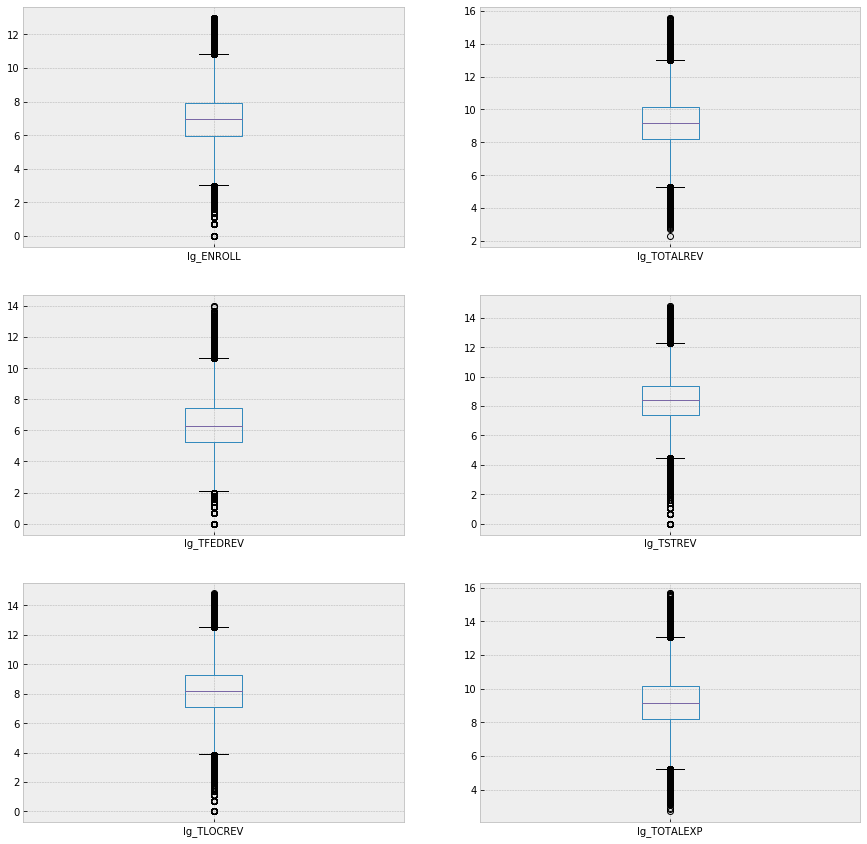

In [39]:
plt.figure(figsize=(15,15))
for i in range(len(lgcolnames)): 
          
    if i == 0:   
        plt.subplot(3,2,1)
    if i == 1:   
        plt.subplot(3,2,2)
    if i == 2:   
        plt.subplot(3,2,3)
    if i ==3:   
        plt.subplot(3,2,4)
    if i == 4:   
        plt.subplot(3,2,5)
    if i == 5:  
        plt.subplot(3,2,6)

    column=findistdf[lgcolnames[i]]
    column.to_frame().boxplot(figsize=[4,8])




Log transformation gives a better representation of these variables with lesser outliers

In [40]:
#Plotting histogram and KDE for total revenue
plt.figure(figsize=(30, 30))
for i in range(len(lgcolnames)): 
          
    if i == 0:   
        plt.subplot(3,2,1)
    if i == 1:   
        plt.subplot(3,2,2)
    if i == 2:   
        plt.subplot(3,2,3)
    if i ==3:   
        plt.subplot(3,2,4)
    if i == 4:   
        plt.subplot(3,2,5)
    if i == 5:  
        plt.subplot(3,2,6)

    axtr = findistdf[lgcolnames[i]].astype('float').hist(bins = 26, color = 'lightblue') #, normed=True)
    findistdf[lgcolnames[i]].plot(kind='kde', color='Green', ax=axtr,  figsize=[16,8])
    #plt.locator_params(nbins=20)
    #plt.title('Histogram - KDE for %s with mean(red), median(yellow) and mode(brown), %findistdf[lgcolnames[i]].name')
    plt.xlabel(findistdf[lgcolnames[i]].name);
    plt.axvline(findistdf[lgcolnames[i]].mean(),color='red',label='Mean')
    plt.axvline(findistdf[lgcolnames[i]].median(),color='yellow',label='Median')
    plt.axvline(findistdf[lgcolnames[i]].mode()[0],color='brown',label='Mode')
    plt.legend()
#plt.title('Histogram - KDE with mean(red), median(yellow) and mode(brown)')

# Exploring data set by STATE and YEAR

In [41]:
findist_bystateyr = pd.DataFrame()
findist_bystateyr = findistdf.groupby(['YRDATA', 'STATE']).sum()

In [42]:
# Displaying top 5 total revenues by state and year
findist_bystateyr.sort_values('TOTALREV',ascending=False)[0:5]

ENROLL  TOTALREV  TFEDREV    TSTREV   TLOCREV  TOTALEXP  \
YRDATA STATE                                                               
2016   TEXAS  5053260.0  57724562  5666460  21937670  30120432  58859458   
2015   TEXAS  5004839.0  55046828  5550680  20903361  28592787  55822147   
2014   TEXAS  4949437.0  52271215  5389557  20452946  26428712  52651972   
2011   TEXAS  4800196.0  50448814  7542016  19510784  23396014  52221814   
2010   TEXAS  4728815.0  49998660  7710320  18799593  23488747  53344838   

                lg_ENROLL  lg_TOTALREV   lg_TFEDREV    lg_TSTREV   lg_TLOCREV  \
YRDATA STATE                                                                    
2016   TEXAS  7242.432264  9874.110413  7159.541881  8807.299383  9001.413488   
2015   TEXAS  7232.728807  9847.412237  7121.440678  8722.951524  9001.347548   
2014   TEXAS  7227.241208  9813.737375  7108.461573  8738.947946  8943.812487   
2011   TEXAS  7239.639505  9827.987325  7568.709826  8848.164697  8843.505689   
2010   TEXAS  7238.895148  9833.663269  7655.391596  8829.589562  8825.812308   

              lg_TOTALEXP  
YRDATA STATE               
2016   TEXAS  9870.138021  
2015   TEXAS  9826.073384  
2014   TEXAS  9803.759441  
2011   TEXAS  9822.246469  
2010   TEXAS  9873.132659

In [43]:
# Displaying bottom 5 total revenues by state and year
findist_bystateyr.sort_values('TOTALREV')[0:5]

ENROLL  TOTALREV  TFEDREV  TSTREV  TLOCREV  TOTALEXP  \
YRDATA STATE                                                                  
1993   SOUTH_DAKOTA  107050.0    465650    52787  120851   292012    481665   
1994   SOUTH_DAKOTA  108439.0    507927    51846  126591   329490    525289   
1993   NORTH_DAKOTA  118536.0    549529    52163  231963   265403    557977   
1994   NORTH_DAKOTA  118670.0    560962    50679  234002   276281    578406   
1995   NORTH_DAKOTA  119132.0    600172    57770  244283   298119    580340   

                       lg_ENROLL  lg_TOTALREV   lg_TFEDREV    lg_TSTREV  \
YRDATA STATE                                                              
1993   SOUTH_DAKOTA   535.762896   664.100837   471.248246   556.500259   
1994   SOUTH_DAKOTA   536.448805   668.787000   470.863467   557.801442   
1993   NORTH_DAKOTA  1281.962611  1705.264803  1046.491984  1475.998235   
1994   NORTH_DAKOTA  1257.753819  1676.509178  1012.583536  1440.213574   
1995   NORTH_DAKOTA  1214.217840  1623.333995   999.034394  1402.861776   

                      lg_TLOCREV  lg_TOTALEXP  
YRDATA STATE                                   
1993   SOUTH_DAKOTA   615.032967   667.542513  
1994   SOUTH_DAKOTA   622.009607   670.644170  
1993   NORTH_DAKOTA  1526.147872  1705.796582  
1994   NORTH_DAKOTA  1503.448081  1679.803284  
1995   NORTH_DAKOTA  1456.964018  1621.265082

# Calculating Mean, Mode, Spread, and Tails 

In [44]:
# statistics for whole data set(including California & New York - school districts)
findistdf_orig2.describe()

ENROLL         YRDATA      TOTALREV       TFEDREV        TSTREV  \
count  3.582930e+05  358293.000000  3.582930e+05  3.582930e+05  3.582930e+05   
mean   3.134504e+03    2004.400390  3.173910e+04  2.689896e+03  1.473310e+04   
std    1.402406e+04       6.849252  1.816932e+05  1.926575e+04  8.418726e+04   
min    0.000000e+00    1993.000000  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.760000e+02    1998.000000  3.299000e+03  1.730000e+02  1.354000e+03   
50%    9.480000e+02    2004.000000  9.498000e+03  5.380000e+02  4.354000e+03   
75%    2.607000e+03    2010.000000  2.575700e+04  1.677000e+03  1.156600e+04   
max    1.077381e+06    2016.000000  2.744836e+07  3.120314e+06  1.056801e+07   

            TLOCREV      TOTALEXP  
count  3.582930e+05  3.582930e+05  
mean   1.431610e+04  3.209838e+04  
std    8.637972e+04  1.937165e+05  
min    0.000000e+00  0.000000e+00  
25%    1.125000e+03  3.231000e+03  
50%    3.513000e+03  9.433000e+03  
75%    1.101400e+04  2.585600e+04  
max    1.514124e+07  2.962010e+07

In [45]:
def descchar(var): 
    """ 
    Function to print descriptive charecteristics of the variable
        Input: dataframe.columnname
        Returns: descriptive charecteristics like - mean, median, mode, spread, interquartile range, skew
        """
    
    print('  Mean, Median, Mode of %s, %f %f %f ' %(var.name, var.mean(), var.median(), var.mode()[0])) 
    print('  Spread - Variance, Standard deviation of %s, %f %f ' %(var.name, var.var(), var.std())) 
    print('  Skew of %s, %f ' %(var.name, var.skew())) 
    print('  Interquartile range of %s, %f %f %f' %(var.name, var.quantile(0.25), var.quantile(0.5), var.quantile(0.75))) 
    
    


In [46]:
# statistics for entire data set with  California & New York school districts
for i in range(len(colnames)):
    print("Descriptive Characteristics for %s" % findistdf_orig2[colnames[i]].name)
    descchar(findistdf_orig2[colnames[i]])

Descriptive Characteristics for ENROLL
  Mean, Median, Mode of ENROLL, 3134.504099 948.000000 0.000000 
  Spread - Variance, Standard deviation of ENROLL, 196674167.451108 14024.056740 
  Skew of ENROLL, 39.215369 
  Interquartile range of ENROLL, 276.000000 948.000000 2607.000000
Descriptive Characteristics for TOTALREV
  Mean, Median, Mode of TOTALREV, 31739.097055 9498.000000 0.000000 
  Spread - Variance, Standard deviation of TOTALREV, 33012411727.751137 181693.180191 
  Skew of TOTALREV, 75.790358 
  Interquartile range of TOTALREV, 3299.000000 9498.000000 25757.000000
Descriptive Characteristics for TFEDREV
  Mean, Median, Mode of TFEDREV, 2689.895753 538.000000 0.000000 
  Spread - Variance, Standard deviation of TFEDREV, 371169206.807162 19265.752173 
  Skew of TFEDREV, 62.346503 
  Interquartile range of TFEDREV, 173.000000 538.000000 1677.000000
Descriptive Characteristics for TSTREV
  Mean, Median, Mode of TSTREV, 14733.104367 4354.000000 0.000000 
  Spread - Variance, Stan

In [47]:
# statistics for data set without California & New York school districts
findistdf.describe()

ENROLL         YRDATA      TOTALREV       TFEDREV        TSTREV  \
count  287744.000000  287744.000000  2.877440e+05  2.877440e+05  2.877440e+05   
mean     3170.830384    2004.461594  3.025546e+04  2.472747e+03  1.398188e+04   
std     10435.217797       6.848307  1.033309e+05  1.225883e+04  4.819758e+04   
min         1.000000    1993.000000  1.000000e+01  1.000000e+00  1.000000e+00   
25%       388.000000    1999.000000  3.653000e+03  1.870000e+02  1.623000e+03   
50%      1073.000000    2004.000000  9.715000e+03  5.390000e+02  4.608000e+03   
75%      2720.000000    2010.000000  2.520025e+04  1.649000e+03  1.150125e+04   
max    437418.000000    2016.000000  5.760419e+06  1.220298e+06  2.710361e+06   

            TLOCREV      TOTALEXP      lg_ENROLL    lg_TOTALREV  \
count  2.877440e+05  2.877440e+05  287744.000000  287744.000000   
mean   1.380084e+04  3.056100e+04       6.912037       9.170890   
std    5.112197e+04  1.057474e+05       1.520550       1.483049   
min    1.000000e+00  1.500000e+01       0.000000       2.302585   
25%    1.224000e+03  3.592000e+03       5.961005       8.203304   
50%    3.524000e+03  9.660000e+03       6.978214       9.181426   
75%    1.072525e+04  2.534300e+04       7.908387      10.134609   
max    2.687925e+06  6.253045e+06      12.988645      15.566521   

          lg_TFEDREV      lg_TSTREV     lg_TLOCREV    lg_TOTALEXP  
count  287744.000000  287744.000000  287744.000000  287744.000000  
mean        6.286498       8.344708       8.169062       9.165001  
std         1.730639       1.577674       1.672722       1.494400  
min         0.000000       0.000000       0.000000       2.708050  
25%         5.231109       7.392032       7.109879       8.186464  
50%         6.289716       8.435549       8.167352       9.175749  
75%         7.407924       9.350211       9.280356      10.140258  
max        14.014606      14.812592      14.804280      15.648579

In [48]:
# statistics for data set without California & New York school districts
for i in range(len(colnames)):
    print("Descriptive Characteristics for %s" % findistdf[colnames[i]].name)
    descchar(findistdf[colnames[i]])

Descriptive Characteristics for ENROLL
  Mean, Median, Mode of ENROLL, 3170.830384 1073.000000 180.000000 
  Spread - Variance, Standard deviation of ENROLL, 108893770.472233 10435.217797 
  Skew of ENROLL, 16.793895 
  Interquartile range of ENROLL, 388.000000 1073.000000 2720.000000
Descriptive Characteristics for TOTALREV
  Mean, Median, Mode of TOTALREV, 30255.458977 9715.000000 2276.000000 
  Spread - Variance, Standard deviation of TOTALREV, 10677274625.544109 103330.898697 
  Skew of TOTALREV, 18.316904 
  Interquartile range of TOTALREV, 3653.000000 9715.000000 25200.250000
Descriptive Characteristics for TFEDREV
  Mean, Median, Mode of TFEDREV, 2472.746674 539.000000 1.000000 
  Spread - Variance, Standard deviation of TFEDREV, 150278906.593238 12258.829740 
  Skew of TFEDREV, 32.430302 
  Interquartile range of TFEDREV, 187.000000 539.000000 1649.000000
Descriptive Characteristics for TSTREV
  Mean, Median, Mode of TSTREV, 13981.876206 4608.000000 40.000000 
  Spread - Varian

Skew is far greater than 1, highlighting that the numbers for every column are skewed heavily towards right with long tail towards higher scale

# Plotting PMFS

In [49]:
#Top 5 states with most total revenue
findist_bystate.sort_values('TOTALREV',ascending=False)[0:5]

STATE  TOTALREV     ENROLL
32    NEW_YORK  27448356  1077381.0
4   CALIFORNIA  10329380   747009.0
13    ILLINOIS   5760419   437418.0
9      FLORIDA   3959408   375836.0
28      NEVADA   3220684   325990.0

In [50]:
# Bottom 5 states with most total revenue
findist_bystate.sort_values('TOTALREV',ascending=True)[0:5]

STATE  TOTALREV   ENROLL
45        VERMONT     84611   3992.0
26        MONTANA    117079  11348.0
19          MAINE    119828   8266.0
34   NORTH_DAKOTA    177525  12561.0
29  NEW_HAMPSHIRE    186461  17737.0

In [51]:
# Comparing 2 states -FLORIDA and VERMONT 
flfindistdf =  findistdf[findistdf.STATE == 'FLORIDA']
vfindistdf =  findistdf[findistdf.STATE == 'VERMONT']

In [52]:
import thinkstats2
import thinkplot


flfindistdfpmf = thinkstats2.Pmf(flfindistdf['TOTALREV'], label='FLORIDA')
vfindistdfpmf = thinkstats2.Pmf(vfindistdf['TOTALREV'], label='VERMONT')

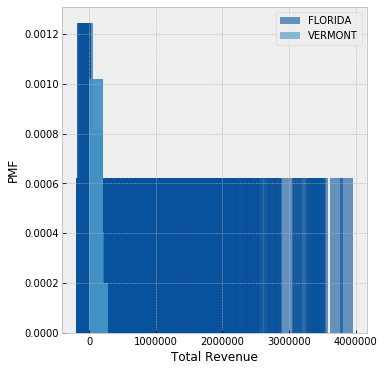

In [53]:
width=200000
axis = [0, 800, 0, 0.0005]

thinkplot.PrePlot(2, cols =2)
thinkplot.Hist(flfindistdfpmf, align = 'right', width = width)
thinkplot.Hist(vfindistdfpmf, align = 'left', width = width)
thinkplot.Config(xlabel = 'Total Revenue', ylabel = 'PMF')

In [54]:
thinkplot.Pmf(flfindistdfpmf)

thinkplot.Pmf(vfindistdfpmf)

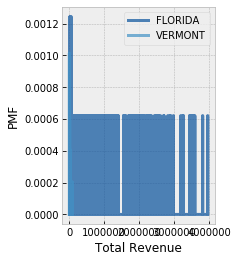

<Figure size 576x432 with 0 Axes>

In [55]:
thinkplot.PrePlot(2)
thinkplot.subplot(2)
#axis = [0, 800, 0, 0.0005]
thinkplot.Pmfs([flfindistdfpmf,vfindistdfpmf ])
thinkplot.Show(xlabel = 'Total Revenue', ylabel = 'PMF')  

# Lets plot PMF of log transformed columns

In [56]:
findistdf.columns

Index(['STATE', 'ENROLL', 'NAME', 'YRDATA', 'TOTALREV', 'TFEDREV', 'TSTREV',
       'TLOCREV', 'TOTALEXP', 'lg_ENROLL', 'lg_TOTALREV', 'lg_TFEDREV',
       'lg_TSTREV', 'lg_TLOCREV', 'lg_TOTALEXP'],
      dtype='object')

In [57]:
lgflfindistdfpmf = thinkstats2.Pmf(flfindistdf['lg_TOTALREV'], label='FLORIDA')
lgvfindistdfpmf = thinkstats2.Pmf(vfindistdf['lg_TOTALREV'], label='VERMONT')

In [58]:
width= 0.5
#axis = [0, 800, 0, 0.0005]

thinkplot.PrePlot(2, cols =2)
thinkplot.Hist(lgflfindistdfpmf, align = 'right',color="blue",  width = width)
thinkplot.Hist(lgvfindistdfpmf, align = 'left',color="orange",  width = width)
thinkplot.Config(xlabel = 'Total Revenue (log)', ylabel = 'PMF')

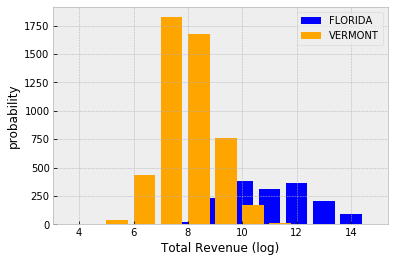

In [59]:
fltr4 = np.array(flfindistdf['lg_TOTALREV'].dropna())
vtr4 = np.array(vfindistdf['lg_TOTALREV'].dropna())

range_lb = int(min([np.min(fltr4), np.min(vtr4)]))
range_ub = int(max([np.max(fltr4), np.max(vtr4)]))

nbr_bins =  range_ub - range_lb

pmf_fltr4 = np.histogram(np.array(fltr4), 
                                bins=nbr_bins, range=(range_lb, range_ub))
pmf_vtr4 = np.histogram(np.array(vtr4), 
                                bins=nbr_bins, range=(range_lb, range_ub))

width = 0.001
plt.bar(np.arange(range_lb, range_ub), pmf_fltr4[0],  align = 'center', color="blue", label="FLORIDA")
plt.bar(np.arange(range_lb, range_ub) + width, pmf_vtr4[0], align = 'edge', color="orange", label="VERMONT")

plt.xlabel("Total Revenue (log)")
plt.ylabel("probability")
plt.legend(loc="best")

Based on the comparisons of PMF's Vermont - school districts are more likely to have lesser total revenues than Illinois school districts

# Calculating CDF

Text(0.5,1,'CDF of TOTAL Revenue')

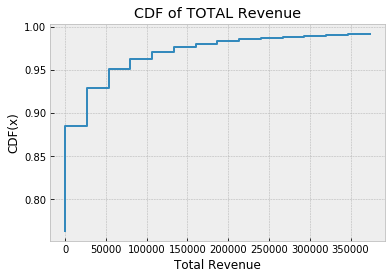

In [60]:
# CDF for total revenue
cdttlrev = np.sort(findistdf.TOTALREV) #ENROLL)
hist = np.histogram(cdttlrev, bins=15, range=(0,400000))
sz = len(cdttlrev)

plt.step(hist[1][:-1], np.cumsum(hist[0])/sz)
plt.xlabel("Total Revenue")
plt.ylabel("CDF(x)")
plt.title("CDF of TOTAL Revenue")

95% of the total revenues for all school districts are less than 50,000

In [61]:
# comparing CDF's of total revenue for school districts in different states

vfindistdf =  findistdf[findistdf.STATE == 'VERMONT']
ilfindistdf =  findistdf[findistdf.STATE == 'ILLINOIS']

actvtr = np.array(vfindistdf['TOTALREV'].dropna())
actiltr = np.array(ilfindistdf['TOTALREV'].dropna())


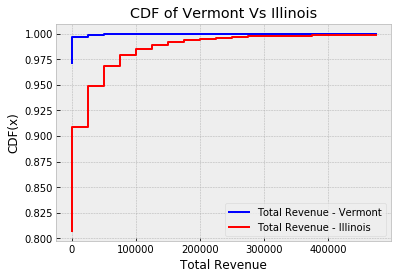

In [62]:
# CDF for Vermont state
vcdttlrev = np.sort(actvtr) #ENROLL)
histv = np.histogram(vcdttlrev, bins=20, range=(0,500000))
szv = len(vcdttlrev)

# CDF for Illionis state
ilcdttlrev = np.sort(actiltr) #ENROLL)
histil = np.histogram(ilcdttlrev, bins=20, range=(0,500000))
szil = len(ilcdttlrev)


plt.step(histv[1][:-1], np.cumsum(histv[0])/szv, color = 'blue', label = 'Total Revenue - Vermont')
plt.step(histil[1][:-1], np.cumsum(histil[0])/szil, color = 'red', label = 'Total Revenue - Illinois')
plt.xlabel("Total Revenue")
plt.ylabel("CDF(x)")
plt.title('CDF of Vermont Vs Illinois')
plt.legend()

Overall school districts in Illinois have higher total revenue than Vermont and 98% of the total revenues for all school districts in Illinois is less than 100,000. Whereas for Vermont, almost 97% of the total revenues for school districts are below 50000$.
Put it in another way, Illinois school districts have higher chance of having more Total Revenue.

# Plotting analytical distributions

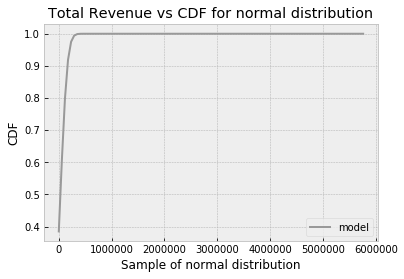

In [63]:
# PLotting analytical distributions for total revenue

# calculate the mean and standard deviation

mean_tr = np.mean(findistdf.TOTALREV)
mean_tr

std_tr = np.std(findistdf.TOTALREV)
std_tr

# plot a normal distribution with the mean and standard deviation of total revenue

low = min(findistdf.TOTALREV)
high = max(findistdf.TOTALREV)


xs = np.linspace(low, high, 100)
ps = stats.norm.cdf(xs, mean_tr, std_tr)

plt.plot(xs, ps, label='model', color='0.6')

plt.title('Total Revenue vs CDF for normal distribution')
plt.xlabel('Sample of normal distribution')
plt.ylabel('CDF')
plt.legend()


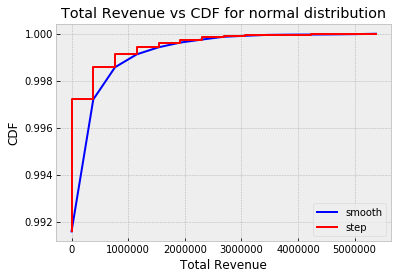

In [64]:
# CDF for total revenue
cdttlrev = np.sort(findistdf.TOTALREV) #ENROLL)
hist = np.histogram(cdttlrev, bins=15, range=(0,max(findistdf.TOTALREV)))
sz = len(cdttlrev)


plt.plot(hist[1][:-1], np.cumsum(hist[0])/sz, color = 'b', label = 'smooth')

plt.step(hist[1][:-1], np.cumsum(hist[0])/sz, color = 'r', label = 'step')

plt.title('Total Revenue vs CDF for normal distribution')
plt.xlabel('Total Revenue')
plt.ylabel('CDF')
plt.legend()

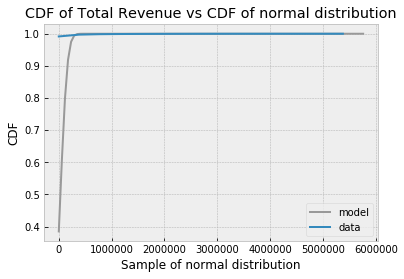

In [65]:
# Overlapping distribution plots of normal distribution and cdf distribution of total revenues

plt.plot(xs, ps, label='model', color='0.6')
plt.plot(hist[1][:-1], np.cumsum(hist[0])/sz, label='data')

plt.title('CDF of Total Revenue vs CDF of normal distribution')
plt.xlabel('Sample of normal distribution')
plt.ylabel('CDF')

plt.legend()

From the above overlapping plot of normal distribution vs total revenue, we can infer that Normal distribution doesn’t represent the total revenue. Let us try to see if log normal distribution is applicable.  
To find out I will use the log transformed total revenue column - findistdf.lg_TOTALREV

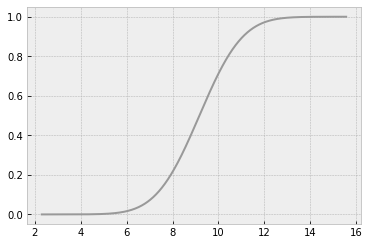

In [66]:
mean_ltr = np.mean(findistdf.lg_TOTALREV)
mean_ltr

std_ltr = np.std(findistdf.lg_TOTALREV)
std_ltr

# plot a normal distribution with the mean and standard deviation of total revenue

llow = min(findistdf.lg_TOTALREV)
lhigh = max(findistdf.lg_TOTALREV)

 
lxs = np.linspace(llow, lhigh, 10000)
lps = stats.norm.cdf(lxs, mean_ltr, std_ltr)

plt.plot(lxs,lps, label='model', color='0.6')



In [67]:

mean_ltr = np.mean(findistdf.lg_TOTALREV)
mean_ltr

std_ltr = np.std(findistdf.lg_TOTALREV)
std_ltr

# plot a normal distribution with the mean and standard deviation of total revenue

llow2 = mean_ltr - 4 * std_ltr 
lhigh2 = mean_ltr + 4 * std_ltr 

 
lxs2 = np.linspace(llow2, lhigh2, 10000)
lps2 = stats.norm.cdf(lxs2, mean_ltr, std_ltr)

plt.plot(lxs2,lps2, label='model', color='0.6')
plt.title('Log (Total Revenue) vs CDF of log normal distribution')
plt.xlabel('Sample of log normal distribution')
plt.ylabel('CDF')


Text(0,0.5,'CDF')

In [68]:
# CDF for log transformed total revenue
cdttlrev4 = np.sort(findistdf.lg_TOTALREV) #ENROLL)
hist = np.histogram(cdttlrev4, bins=1000, range=(0,max(findistdf.lg_TOTALREV)))
sz = len(cdttlrev4)


plt.plot(hist[1][:-1], np.cumsum(hist[0])/sz)

plt.title('Log (Total Revenue) vs CDF')
plt.xlabel('Log (Total Revenue)')
plt.ylabel('CDF')

#plt.legend()

Text(0,0.5,'CDF')

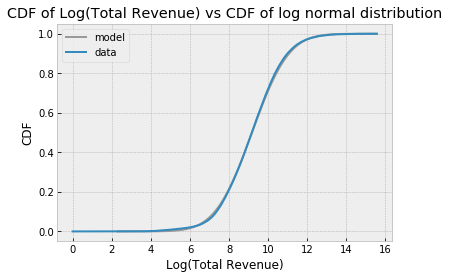

In [69]:
# Overlapping distribution plots of log normal distribution and cdf distribution of log (total revenues)

plt.plot(lxs,lps, label='model', color='0.6')
plt.plot(hist[1][:-1], np.cumsum(hist[0])/sz, label='data')

plt.title('CDF of Log(Total Revenue) vs CDF of log normal distribution')
plt.xlabel('Log(Total Revenue)')
plt.ylabel('CDF')
plt.legend()

From the above overlapping plot of log normal distribution vs log(total revenue), we can infer that log normal distribution perfectly fits for the variable total revenue

# Probability plots for total revenue and Log (total revenue)

In [70]:
xs = [-5, 5]
# y(x) = mean + std * x, here mean and standard deviation are from Total Revenue
ys = mean_tr + std_tr * np.sort(xs) 
plt.plot(xs, ys, color='red', label='model')

plt.xlabel('Z')
plt.ylabel('Total Revenue (linear scale)')

Text(0,0.5,'Total Revenue (linear scale)')

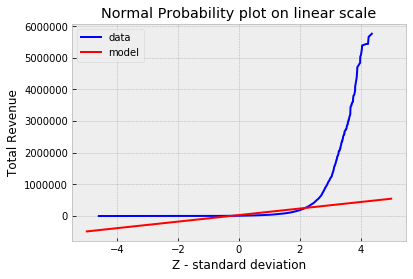

In [71]:
n = len(findistdf.TOTALREV)
xs2 = np.sort(np.random.normal(0, 1, n))
ys2 = np.sort(np.array(findistdf.TOTALREV))

plt.plot(xs2, ys2, color='blue', label='data')
plt.plot(xs, ys, color='red', label='model')

plt.title('Normal Probability plot on linear scale')
plt.xlabel("Z - standard deviation")
plt.ylabel('Total Revenue')
plt.legend()


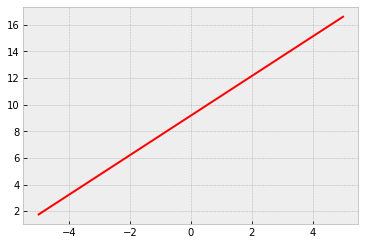

In [72]:
# Normal probability plot of log normal form

xs = [-5, 5]
# y(x) = mean + std * x, here mean and standard deviation are from log transformed Total Revenue
ys = mean_ltr + std_ltr * np.sort(xs)
plt.plot(xs, ys, color='red', label='model')


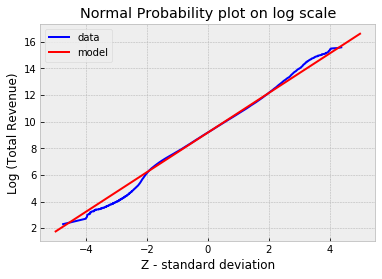

In [73]:
n = len(findistdf.lg_TOTALREV)
xs2 = np.sort(np.random.normal(0, 1, n))
ys2 = np.sort(np.array(findistdf.lg_TOTALREV))

plt.plot(xs2, ys2, color='blue', label='data')
plt.plot(xs, ys, color='red', label='model')

plt.title('Normal Probability plot on log scale')
plt.xlabel("Z - standard deviation")
plt.ylabel("Log (Total Revenue)")

plt.legend()

From the above two normal probability plots, we can infer that data deviates substantially from normal model 
where as log normal model fits perfectly to the data with in 2 standard deviations (between -2 to 2) but deviates from the log normal model significantly for the school districts with lower and higher end of the (log) total revenue scale.

# Scatter plots and Correlation analysis

In [74]:
findistdf.head()

STATE   ENROLL                            NAME  YRDATA  TOTALREV  \
0  ALABAMA   9609.0  AUTAUGA COUNTY SCHOOL DISTRICT    2016     80867   
1  ALABAMA  30931.0  BALDWIN COUNTY SCHOOL DISTRICT    2016    338236   
2  ALABAMA    912.0  BARBOUR COUNTY SCHOOL DISTRICT    2016     10116   
3  ALABAMA   2842.0    EUFAULA CITY SCHOOL DISTRICT    2016     26182   
4  ALABAMA   3322.0     BIBB COUNTY SCHOOL DISTRICT    2016     32486   

   TFEDREV  TSTREV  TLOCREV  TOTALEXP  lg_ENROLL  lg_TOTALREV  lg_TFEDREV  \
0     7447   53842    19578     76672   9.170455    11.300561    8.915567   
1    23710  145180   169346    299880  10.339514    12.731499   10.073652   
2     2342    5434     2340     10070   6.815640     9.221874    7.758761   
3     3558   15900     6724     29843   7.952263    10.172827    8.176954   
4     3664   21846     6976     31662   8.108322    10.388565    8.206311   

   lg_TSTREV  lg_TLOCREV  lg_TOTALEXP  
0  10.893809    9.882162    11.247292  
1  11.885730   12.039699    12.611138  
2   8.600431    7.757906     9.217316  
3   9.674074    8.813438    10.303706  
4   9.991773    8.850231    10.362873

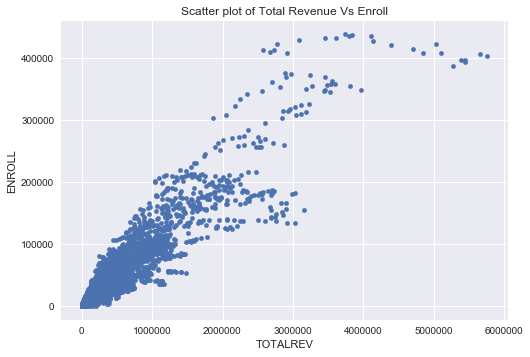

In [75]:
#plt.style.use('ggplot')
plt.style.use('seaborn')
findistdf.plot(x= 'TOTALREV', y = 'ENROLL', kind = 'scatter' ) 
plt.title('Scatter plot of Total Revenue Vs Enroll')
plt.show()


The above chart shows that school districts with higher total revenue has better enrollment than the school districts with lower total revenue, agrees with one of our assumptions.

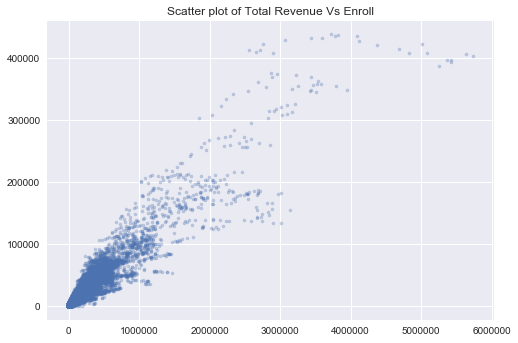

In [76]:
# Scatter plot with jitter
jitter = 20000
TOTALREV = findistdf.TOTALREV + np.random.uniform(-jitter, jitter)
plt.scatter(TOTALREV, findistdf.ENROLL, alpha = 0.3, s = 10)
plt.title('Scatter plot of Total Revenue Vs Enroll')
plt.show()

In [77]:
# Scatter plot between log(total revenue) and enroll

jitter = 1
lg_TOTALREV = findistdf.lg_TOTALREV + np.random.uniform(-jitter, jitter)
plt.scatter(lg_TOTALREV, findistdf.ENROLL, alpha = 0.3, s = 10)
plt.title('Scatter plot of log(Total Revenue) vs Enroll')
plt.show()

In [78]:
# Scatter plot between log(total revenue) and log(enroll)

jitter = 0.3
ENROLL4 =  findistdf.lg_ENROLL + np.random.uniform(-jitter, jitter)
TOTALREV4 = findistdf.lg_TOTALREV + np.random.uniform(-jitter, jitter)
plt.scatter(TOTALREV4, ENROLL4, alpha = .2, s = 10)
plt.title('Scatter plot of log(Total Revenue) vs Enroll')
plt.show()

# Characterizing Relationships

In [79]:

findistdf2 = findistdf.dropna(subset = ['ENROLL',  'TOTALREV'])
bins = np.arange(0, 30000000, 200000)
indicies = np.digitize(findistdf2.TOTALREV, bins)

grps = findistdf2.groupby(indicies)

In [80]:
for i, group in grps:
    print(i, len(group))

1 281561
2 3932
3 1093
4 394
5 220
6 171
7 87
8 56
9 41
10 37
11 31
12 24
13 18
14 21
15 17
16 10
17 3
18 9
19 3
20 3
21 2
22 1
24 1
25 1
26 2
27 2
28 2
29 2


In [81]:
mean_tr = [group.TOTALREV.mean() for i, group in grps]
cdfs = [thinkstats2.Cdf(group.ENROLL) for i, group in grps]

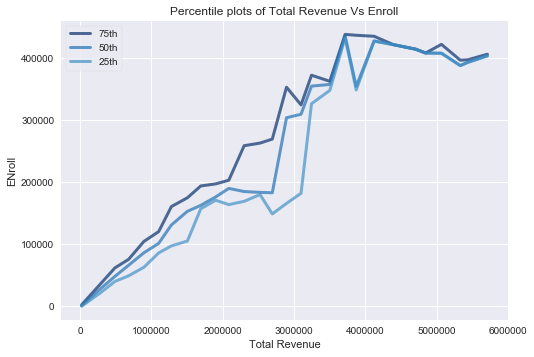

In [82]:
for percent in [75, 50, 25]:
    enroll_percentiles = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(mean_tr, enroll_percentiles, label=label)
    thinkplot.Config(xlabel='Total Revenue',  ylabel='ENroll',legend=True)
    plt.title('Percentile plots of Total Revenue Vs Enroll')

Above percentiles plotof of Total Revenue Vs Enroll, relationship is linear upto 3500000$, after that relationship is going in the wrong direction.

In [83]:
descchar(findistdf['TOTALREV'])

  Mean, Median, Mode of TOTALREV, 30255.458977 9715.000000 2276.000000 
  Spread - Variance, Standard deviation of TOTALREV, 10677274625.544109 103330.898697 
  Skew of TOTALREV, 18.316904 
  Interquartile range of TOTALREV, 3653.000000 9715.000000 25200.250000


# Covariance and Correlation

In [84]:
# Covariance

def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

Cov(findistdf2.TOTALREV, findistdf2.ENROLL)

1024052236.613642

In [85]:
# Calculating Correlation between total revenue and Enroll in school districts
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

Corr(findistdf2.TOTALREV, findistdf2.ENROLL)


0.9497119340376089

Correlation value of 0.95 indicates that total revenue and enroll variables are strongly and positively correlated; and it implies that school districts with higher total revenue tend to have higher enrollments in 
those schools. 
But our distributions are highly skewed and are not normal distributions, so let’s find out the Spearman's Rank correlation as well.

In [86]:
def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

SpearmanCorr(findistdf2.TOTALREV, findistdf2.ENROLL)

0.9560835084463589

# Hypothesis Testing

Defining Null Hypothesis: My earlier assumption is that school districts with higher total revenue will have higher enrollments in the school. Based on that, my Null hypothesis is that there is no relationship between Total revenue and school enrollments for school districts. The p-value for this correlation testing is to find out the probability of having such a high observed correlation of 0.95 by pure chance should be significant (pvalue > 0.05).

Let us find out with Hypothesis testing.

In [87]:
findistdf.head()

STATE   ENROLL                            NAME  YRDATA  TOTALREV  \
0  ALABAMA   9609.0  AUTAUGA COUNTY SCHOOL DISTRICT    2016     80867   
1  ALABAMA  30931.0  BALDWIN COUNTY SCHOOL DISTRICT    2016    338236   
2  ALABAMA    912.0  BARBOUR COUNTY SCHOOL DISTRICT    2016     10116   
3  ALABAMA   2842.0    EUFAULA CITY SCHOOL DISTRICT    2016     26182   
4  ALABAMA   3322.0     BIBB COUNTY SCHOOL DISTRICT    2016     32486   

   TFEDREV  TSTREV  TLOCREV  TOTALEXP  lg_ENROLL  lg_TOTALREV  lg_TFEDREV  \
0     7447   53842    19578     76672   9.170455    11.300561    8.915567   
1    23710  145180   169346    299880  10.339514    12.731499   10.073652   
2     2342    5434     2340     10070   6.815640     9.221874    7.758761   
3     3558   15900     6724     29843   7.952263    10.172827    8.176954   
4     3664   21846     6976     31662   8.108322    10.388565    8.206311   

   lg_TSTREV  lg_TLOCREV  lg_TOTALEXP  
0  10.893809    9.882162    11.247292  
1  11.885730   12.039699    12.611138  
2   8.600431    7.757906     9.217316  
3   9.674074    8.813438    10.303706  
4   9.991773    8.850231    10.362873

In [88]:
findist_bystate_mn = pd.DataFrame()
findist_bystate_mn = findistdf.groupby('STATE', as_index = False)['TOTALREV', 'ENROLL'].mean()
findist_bystate_mn.sort_values('TOTALREV',ascending=False)[0:5]

STATE      TOTALREV         ENROLL
9           HAWAII  2.047635e+06  183417.458333
18        MARYLAND  4.132408e+05   35081.586806
7          FLORIDA  3.172400e+05   37111.053483
26          NEVADA  1.803720e+05   21480.924020
30  NORTH_CAROLINA  9.168736e+04   11389.473421

In [89]:
findist_bystate_mn.sort_values('ENROLL',ascending=False)[0:5]

STATE      TOTALREV         ENROLL
9     HAWAII  2.047635e+06  183417.458333
7    FLORIDA  3.172400e+05   37111.053483
18  MARYLAND  4.132408e+05   35081.586806
26    NEVADA  1.803720e+05   21480.924020
41      UTAH  8.064527e+04   12644.656670

In [90]:
Hyp_df = findistdf.dropna(subset = ['ENROLL',  'TOTALREV'])
Hyp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287744 entries, 0 to 358292
Data columns (total 15 columns):
STATE          287744 non-null object
ENROLL         287744 non-null float64
NAME           287744 non-null object
YRDATA         287744 non-null int64
TOTALREV       287744 non-null int64
TFEDREV        287744 non-null int64
TSTREV         287744 non-null int64
TLOCREV        287744 non-null int64
TOTALEXP       287744 non-null int64
lg_ENROLL      287744 non-null float64
lg_TOTALREV    287744 non-null float64
lg_TFEDREV     287744 non-null float64
lg_TSTREV      287744 non-null float64
lg_TLOCREV     287744 non-null float64
lg_TOTALEXP    287744 non-null float64
dtypes: float64(7), int64(6), object(2)
memory usage: 35.1+ MB


In [91]:
# Pearson correlation
pecorr, p = stats.pearsonr(Hyp_df.TOTALREV, Hyp_df.ENROLL)
pecorr, p

(0.9497119340376095, 0.0)

In [92]:
# Spearman correlation
corr2, p2 = stats.spearmanr(Hyp_df.TOTALREV, Hyp_df.ENROLL)
corr2, p2

(0.9560835084463587, 0.0)

In [93]:
trenr_df = Hyp_df[['TOTALREV', 'ENROLL']]

In [94]:
stat, p, dof, expected = stats.chi2_contingency(trenr_df)
stat, p, dof, expected

(108740524.95546971, 0.0, 287743, array([[8.18934126e+04, 8.58258740e+03],
        [3.34147679e+05, 3.50193205e+04],
        [9.98187977e+03, 1.04612023e+03],
        ...,
        [1.23614918e+04, 1.29550816e+03],
        [6.90078449e+03, 7.23215508e+02],
        [2.81317395e+03, 2.94826049e+02]]))

Method for testing this null hypothesis is to randomly generate values for total revenue and enroll with the same mean and standard deviation of the current data set and calculate the Correlation and P- value for that sample data set. Repeat the process for some iterations (100)


In [95]:

def samplepermute(iters = 100):
    ''' 
    Function to permutate the TOTALREV randomly and calculate Correlation, p value and Covariance of that  data set.
    iters is number of iterations of test
    returns: 
    smpcorr - sample correlation
    smppval - sample pvalue
    count/iters - % of samples that have sampled correlation greater than observed correlation
    '''
    smpcorr = []
    smppval = []
    count = 0
    df = pd.DataFrame()
    for j in range(iters):


        corr, p = stats.pearsonr(np.random.permutation(Hyp_df.TOTALREV),Hyp_df.ENROLL) 
        cov  = Cov(np.random.permutation(Hyp_df.TOTALREV), Hyp_df.ENROLL)


        if abs(corr) >= pecorr:
            count += 1
        smpcorr.append(corr)
        smppval.append(p)
    return smpcorr, smppval, count/iters
        
    

In [96]:
test2corr, test2p, test2count = samplepermute( iters = 100)
test2count

0.0

The probability of having such a high (observed - 0.95) correlation between Total Revenue & Enroll by chance is 0. Hence null hypothesis that there is no correlation between Total Revenue and Enroll is false.

# Regression Analysis

In [97]:
findistdf1 = findistdf.dropna(subset = ['ENROLL',  'TOTALREV'])

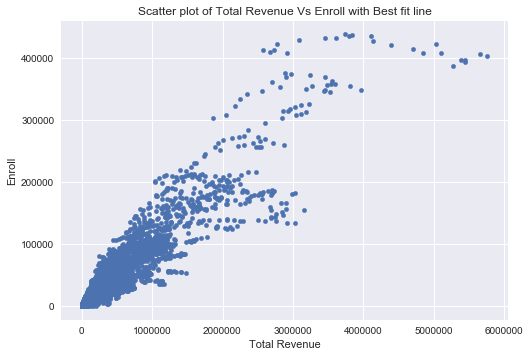

In [98]:
#PLotting scatter plot between Total Revenue and Enroll
#plt.style.use('ggplot')
plt.style.use('seaborn')
findistdf1.plot(x= 'TOTALREV', y = 'ENROLL', kind = 'scatter' )
plt.xlabel('Total Revenue')
plt.ylabel('Enroll')
plt.title('Scatter plot of Total Revenue Vs Enroll with Best fit line')
plt.show()


# Linear Least Square Model

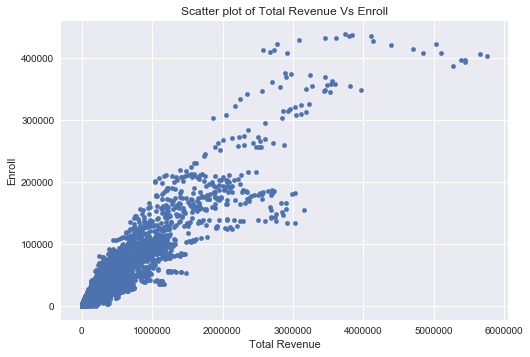

In [99]:
# plotting scatter plot again
plt.style.use('seaborn')
findistdf1.plot(x= 'TOTALREV', y = 'ENROLL', kind = 'scatter' )
plt.xlabel('Total Revenue')
plt.ylabel('Enroll')
plt.title('Scatter plot of Total Revenue Vs Enroll')
plt.show()


In [100]:
#Calculating slope & iter

meantr = np.mean(findistdf1.TOTALREV)
meanenr = np.mean(findistdf1.ENROLL)

slope = (meantr * meanenr - np.mean(findistdf1.TOTALREV * findistdf1.ENROLL))/ (meantr**2 -  np.mean(findistdf1.TOTALREV **2) )

inter = meanenr - meantr*slope

meantr, meanenr, slope, inter

(30255.458977424376, 3170.830383952402, 0.09590984885567204, 269.0338863686443)

In [101]:
# Drawing best fit line

plt.scatter(findistdf1.TOTALREV, findistdf1.ENROLL)
TR_minmax = [np.min(findistdf1.TOTALREV), np.max(findistdf1.TOTALREV)]


Regressionline = [slope*t + inter for t in TR_minmax ]

plt.plot(TR_minmax, Regressionline, color = "red", alpha =0.3)
plt.xlabel('Total Revenue (Independant variable)')
plt.ylabel('Enroll (dependant variable)')
plt.title('Scatter plot of Total Revenue Vs Enroll with Linear line fit')

Text(0.5,1,'Scatter plot of Total Revenue Vs Enroll with Linear line fit')

Above plot confirms the linear relationship between Total Revenue and Enroll

# Goodness of Linear Least Square fit

Calculating Residuals, RMSE, Coeffecient of Determination

Goodness of linear least square fit can be found by comparing the Root mean square error between with model and without model. 

In [102]:
# PLotting residuals
def Residuals(xs, ys, inter, slope):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    res = ys - (inter + slope * xs)
    return res

findistdf1['residual'] = Residuals(findistdf1.TOTALREV, findistdf1.ENROLL, inter, slope)
#len(findistdf1['residual'])

In [103]:
# Function to calculate Root mean squared error
def RMSE(ys, pred_ys):
    yactual = np.array(ys)
    ypred = np.array(pred_ys)
    error = (yactual - ypred)**2
    errmean = np.mean(error)
    errsqrt = sqrt(errmean)
    return errsqrt

xs = np.array(findistdf1.TOTALREV)
# predicted value for enroll using linear least square
pred_ys = [inter + (slope * x) for x in np.array(findistdf1.TOTALREV)]
RMSE(findistdf1.ENROLL, pred_ys)

3267.521506975128

In [104]:
# Calculating Root Mean Square Error (RMSE) - Standard deviation of residuals
np.std(findistdf1['residual']), np.std(findistdf1['ENROLL'])


(3267.521506975102, 10435.199664236075)

Without any model, RMSE of predicted Enroll numbers is represented by its standard deviation – which here in this case is 10435.

With Linear Least Square fit model, RMSE of predicted Enroll numbers from known Total Revenues is calculated by finding the residuals from prediction (Observed Enroll – Predicted Enroll)  and finding the standard deviation from the residual. In this case it is 3267.

As predicting Enrollment numbers with Linear Least Square model results in lesser standard deviation, in this case knowing the total revenue and predicting enrollment numbers from it has significantly helped for better prediction and reducing the error.


In [105]:
# Coeffecient of Determination:
resid_var = np.var(findistdf1['residual'])
enroll_var = np.var(findistdf1['ENROLL'])

CoeffD = 1 - resid_var/enroll_var
CoeffD

0.9019527576534582

CoeffD of 0.90 indicates that total revenue helps predict almost 90% of the variance in the enrollment numbers for school districts.

# Plotting residuals

In [106]:
bins = np.arange(min(findistdf1.TOTALREV), max(findistdf1.TOTALREV), 250000)
indices = np.digitize(findistdf1.TOTALREV, bins)
groups = findistdf1.groupby(indices)

trbin_means = [group.TOTALREV.mean() for _, group in groups][1:-1]
#len(trbin_means) = 50

In [107]:
cdfs = [thinkstats2.Cdf(group.residual) for _, group in groups][1:-1]

In [108]:
def PlotPercentiles(trbin_means, cdfs):
    thinkplot.PrePlot(3)
    for percent in [75, 50, 25]:
        weight_percentiles = [cdf.Percentile(percent) for cdf in cdfs]
        label = '%dth' % percent
        thinkplot.Plot(trbin_means, weight_percentiles, label=label)

In [109]:
PlotPercentiles(trbin_means, cdfs)

thinkplot.Config(xlabel="Total Revenue", ylabel='Residuals')

The residual plots are not straight lines, indicates that relationship between total revenue and enroll is non - linear. 
The gap between inter quartile residuals is most at the total revenue of 3 Million.


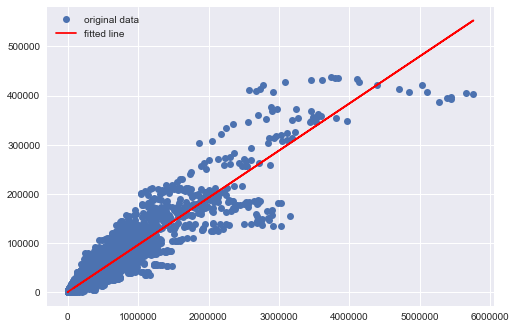

In [110]:
# Plotting best fit line with stats modules
plt.plot(findistdf1.TOTALREV, findistdf1.ENROLL, 'o', label='original data')
plt.plot(findistdf1.TOTALREV, inter + slope*findistdf1.TOTALREV, 'r', label='fitted line')
plt.legend()
plt.show()

# Testing Linear Model

In [111]:
#To estimate the sampling distribution of inter and slope, I'll use resampling.

def SampleRows(df, nrows, replace=False):
    """Choose a sample of rows from a DataFrame.

    df: DataFrame
    nrows: number of rows
    replace: whether to sample with replacement

    returns: DataDf
    """
    indices = np.random.choice(df.index, nrows, replace=replace)
    sample = df.loc[indices]
    return sample

def ResampleRows(df):
    """Resamples rows from a DataFrame.

    df: DataFrame

    returns: DataFrame
    """
    return SampleRows(df, len(df), replace=True)

In [112]:
def SamplingDistributions(findistdf1, iters=101):
    inters = []
    slopes = []
    for _ in range(iters):
        sample = ResampleRows(findistdf1)
        TOTALREV = sample.TOTALREV
        ENROLL = sample.ENROLL
        
        slope = (meantr * meanenr - np.mean(findistdf1.TOTALREV * findistdf1.ENROLL))/ (meantr**2 -  np.mean(findistdf1.TOTALREV **2) )
        slopes.append(slope)
        inter = meanenr - meantr*slope
        inters.append(inter)

    return inters, slopes

In [113]:
inters, slopes = SamplingDistributions(findistdf1, iters=100)

In [114]:
slope_cdf = thinkstats2.Cdf(slopes)
pvalue = slope_cdf[0]
pvalue

0.0

Probability that the slope in the sampling distribution falls below 0 (p-value) is 0; as it is less than 
0.001 indicating that the relation between Total Revenue and Enroll is statistically significant and not by chance.

No handles with labels found to put in legend.


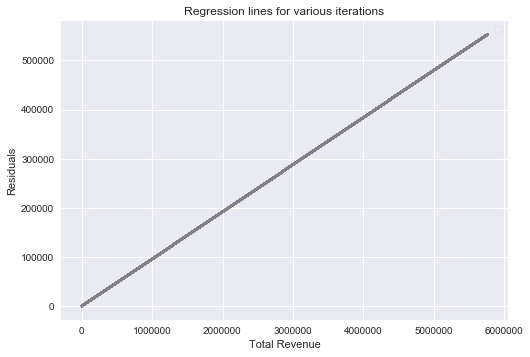

In [115]:
for slope, inter in zip(slopes, inters):
    fxs = np.sort(findistdf1.TOTALREV)
    fys =  inter + slope * fxs
    thinkplot.Plot(fxs, fys, color='gray', alpha=0.01)
    
thinkplot.Config(xlabel="Total Revenue", ylabel='Residuals', title = "Regression lines for various iterations")

After repeated sampling the regression line roughly stayed in the same place, so it is a low variance model

# Regression Analysis - Ordinary Least Square Model

In [116]:
import statsmodels.formula.api as smf

formula = 'findistdf1.ENROLL ~ findistdf1.TOTALREV'
model = smf.ols(formula, data=findistdf1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      findistdf1.ENROLL   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                 2.647e+06
Date:                Sun, 03 Mar 2019   Prob (F-statistic):               0.00
Time:                        16:59:57   Log-Likelihood:            -2.7367e+06
No. Observations:              287744   AIC:                         5.473e+06
Df Residuals:                  287742   BIC:                         5.473e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             269.0339      6.347     42.387      0.000     256.594     281.474
findistdf1.TOTALREV     0.0959    5.9e-05   1626.956      0.000       0.096       0.096
==============================================================================
Omnibus:                   167866.320   Durbin-Watson:                   1.533
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       2577381320.624
Skew:                           0.853   Prob(JB):                         0.00
Kurtosis:                     466.649   Cond. No.                     1.12e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [117]:
inter = results.params['Intercept']
slope = results.params['findistdf1.TOTALREV']
inter, slope

(269.0338863686441, 0.09590984885567201)

Interpreting the coefficients:
    slope value of 0.095 infers that unit increase in total revenue is associated with 0.095 unit increase in enroll numbers for the school districts.

In [118]:
slope_pvalue = results.pvalues['findistdf1.TOTALREV']
slope_pvalue

0.0

As P-value is less than 0.001, the estimated slope is significant

In [119]:
# Coefficient of determination
results.rsquared

0.9019527576534563

R- Square value of 0.90 shows that variation in enrollment can be explained by variation in Total Revenue upto 90%. As more variance is being explained by the model, once again proves the fit of the model.

In [120]:
#plotting residuals

pred_val = results.fittedvalues.copy()
true_val = findistdf1['ENROLL'].values.copy()
residual = true_val - pred_val


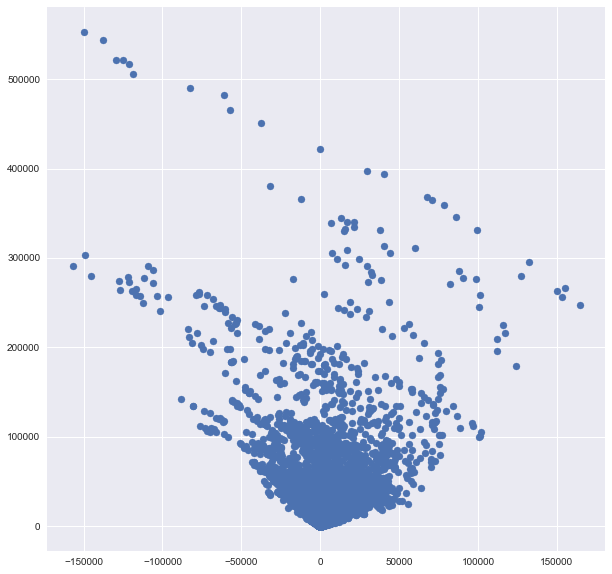

In [121]:
fig, ax = plt.subplots(figsize=(10,10))
residplot = ax.scatter(residual, pred_val)

In [122]:
# Drawing normal probability plot

fig, ax = plt.subplots(figsize=(8,6))
_, (__, ___, r) = stats.probplot(residual, plot=ax, fit=True)

r**2
#stats.probplot(residual, plot=ax, fit=True)

0.28856453419639605

Above normality plot indicates that this model is good fit only between quartile -2 to +2. After that it 
significantly deviates from linear model.

In [123]:
# Confidence intervals
results.conf_int()

0           1
Intercept            256.593660  281.474113
findistdf1.TOTALREV    0.095794    0.096025

In [124]:
# p-values for the model coefficients
results.pvalues

Intercept              0.0
findistdf1.TOTALREV    0.0
dtype: float64

Again p-values are way less than 0.05, indicating that the relation between dependent and independent variables is genuine.

# Correlation matrix

In [125]:
# Compute the correlation matrix
corr = findistdf1.corr()

In [126]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,   cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Multiple Linear Regression

In [127]:
# understanding whether the enrollment in school districts depends on Total Revenue and STATE as well
formula2 = 'findistdf1.ENROLL ~ findistdf1.TOTALREV + findistdf1.STATE'
model2 = smf.ols(formula2, data=findistdf1)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      findistdf1.ENROLL   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                 6.001e+04
Date:                Sun, 03 Mar 2019   Prob (F-statistic):               0.00
Time:                        17:00:19   Log-Likelihood:            -2.7256e+06
No. Observations:              287744   AIC:                         5.451e+06
Df Residuals:                  287695   BIC:                         5.452e+06
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                           1532.3320     56.355     27.191      0.000    1421.879    1642.785
findistdf1.STATE[T.ALASKA]         -2199.2865    104.556    -21.035      0.000   -2404.214   -1994.359
findistdf1.STATE[T.ARIZONA]         -417.4164     71.257     -5.858      0.000    -557.077    -277.756
findistdf1.STATE[T.ARKANSAS]       -1115.0905     68.958    -16.171      0.000   -1250.246    -979.935
findistdf1.STATE[T.COLORADO]        -738.0253     75.055     -9.833      0.000    -885.132    -590.919
findistdf1.STATE[T.CONNECTICUT]    -2616.1656     75.174    -34.801      0.000   -2763.505   -2468.826
findistdf1.STATE[T.DELAWARE]       -2478.3766    157.822    -15.704      0.000   -2787.704   -2169.050
findistdf1.STATE[T.FLORIDA]         5476.4652     97.969     55.900      0.000    5284.449    5668.481
findistdf1.STATE[T.GEORGIA]         -364.2124     74.324     -4.900      0.000    -509.885    -218.540
findistdf1.STATE[T.HAWAII]         -1.241e+04    655.887    -18.922      0.000   -1.37e+04   -1.11e+04
findistdf1.STATE[T.IDAHO]           -690.4462     82.829     -8.336      0.000    -852.788    -528.104
findistdf1.STATE[T.ILLINOIS]       -1494.2636     60.310    -24.776      0.000   -1612.470   -1376.058
findistdf1.STATE[T.INDIANA]        -1324.6744     67.702    -19.566      0.000   -1457.369   -1191.980
findistdf1.STATE[T.IOWA]           -1379.2891     65.512    -21.054      0.000   -1507.692   -1250.887
findistdf1.STATE[T.KANSAS]         -1337.5525     67.529    -19.807      0.000   -1469.907   -1205.198
findistdf1.STATE[T.KENTUCKY]        -712.5058     75.021     -9.497      0.000    -859.545    -565.466
findistdf1.STATE[T.LOUISIANA]        434.5184     96.186      4.517      0.000     245.996     623.041
findistdf1.STATE[T.MAINE]          -1551.7791     71.329    -21.755      0.000   -1691.581   -1411.977
findistdf1.STATE[T.MARYLAND]       -5662.3187    144.385    -39.217      0.000   -5945.310   -5379.328
findistdf1.STATE[T.MASSACHUSETTS]  -2185.4108     66.553    -32.837      0.000   -2315.852   -2054.969
findistdf1.STATE[T.MICHIGAN]       -1276.9411     61.982    -20.602      0.000   -1398.424   -1155.458
findistdf1.STATE[T.MINNESOTA]      -1461.3485     65.965    -22.153      0.000   -1590.638   -1332.059
findistdf1.STATE[T.MISSISSIPPI]     -441.7070     77.151     -5.725      0.000    -592.921    -290.494
findistdf1.STATE[T.MISSOURI]       -1222.7962     62.925    -19.433      0.000   -1346.128   -1099.465
findistdf1.STATE[T.MONTANA]        -1466.7034     64.589    -22.708      0.000   -1593.296   -1340.111
findistdf1.STATE[T.NEBRASKA]       -1461.8182     65.824    -22.208      0.000   -1590.831   -1332.805
findistdf1.STATE[T.NEVADA]          2833.4632    165.765     17.093      0.000    2508.568    31

# Comparing model 1 vs model2:

1) Adjusted R-square of model2 is .909, better than Adjusted R-square of model1 (0.902) - indicating that model2 can explain slightly more variation in dependent variable compared to model1.

2) AIC of model1 is 5.473e+06, which is slightly higher than AIC of model2 5.451e+06, indicating that model2 (enrollment as a function of total revenue and state) is slightly better model among the 2 models.

3) HAWAII has the highest absolute coefficient - indicating that ENROLL'ment numbers change hugely with a single unit of variation in TOTALREV for that state. In other words, we can probably see more enrollment numbers for every same number of units increase in total revenue compared to all other states (all remaining things being constant).

4) LOUISIANA has the lowest absolute coefficient value - indicating that ENROLL numbers will change at a slower rate compared to all other states for the same unit of increase in the total revenue (all remaining things being constant).

5) Overall adding STATE to the ordinary least square model, improved the model very slightly but not significantly. But interesting aspect of adding STATE to the equation is it gives us insights into how each is the relationship between Total Revenue and Enroll for each STATE.


# Outcome of EDA:

The assumption that I had before exploring this data set was that the school districts that are in higher revenue states will have more chance of higher enrollments in the school. After performing EDA, 
I did find statistical correlation between Total Revenues and Enrollment of the school districts. So my assumption was correct. 
One more observation that I made is not all states will respond similarly to the total revenue numbers. For example, take state like LOUISIANA, even though Total Revenues increase for this state, Enrollment numbers will not raise proportionally when compared to other states. 


# What was missing during the analysis?

Having demographic information of each school districts like population, family size, number of school going kids, family income etc. would have added more sense to the analysis. Also one of these or couple of these could be the confounding factors that I highlighted above with STATE – LOUISIANA.

# Variables that could have helped in the analysis?

As states above, demographic information could have helped more in the analysis in finding the actual enrollment prediction for the school districts.

# Assumptions made correct or incorrect?

No. The assumptions that I made that enrollments in school districts are based on Total Revenues of the state was correct, backed by the higher correlation factor and the linear models

# Challenges faced


In the selected data, there were some other aggregated data sets available, which I wanted to explore and compare with the financial school district data set that I selected. But some of the variables that I wanted to explore like GRADES_ALL_G etc. are not available through those sheets. I feel enrollment numbers depend a lot on population or number of families living in that school district. Having a demographic data for these school district would have been an interesting analysis, I would like to try. But that information was not available readily, so I couldn’t venture into that analysis. One more challenge is that some of the states like California, New York are too big to be compared with other smaller states like Vermont, but before realizing this when I performed EDA overall financial school district data set, numbers were highly skewed – and didn’t find an ideal number of bins to represent these variables into proper histogram. Plotting PDF and CDF without using the thinkstats2, thinkplot modules has been a challenge, at some places I gave up trying to figure out other means and ended up using these modules. I would like to explore these in free time. 
